**Step 1: Business Understanding**


Objective: Analyze and predict the usable space of homes (measured as 'sq mt useful').

Deliverables: Descriptive statistics, visualizations, correlation analysis, regression models, model evaluation, and actionable insights.

**Step 2: Data Understanding**


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge

# Load the dataset
file_path = '/content/drive/MyDrive/houses_Madrid.csv'
data = pd.read_csv(file_path)

# Display the columns of the dataframe to verify available columns
print(data.columns)

# Select relevant columns for the analysis based on the objectives and deliverables
selected_columns = ['sq_mt_useful', 'n_rooms', 'n_bathrooms', 'sq_mt_built']

# Filter the dataframe to include only the selected columns
data = data[selected_columns]

# Display the first few rows of the dataframe
print(data.head())

# Get a concise summary of the DataFrame
print(data.info())

# Summary statistics for numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Identify unique values in each column
for column in data.columns:
    print(f"Unique values in {column}: {data[column].nunique()}")


Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude',
       'longitude', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parki

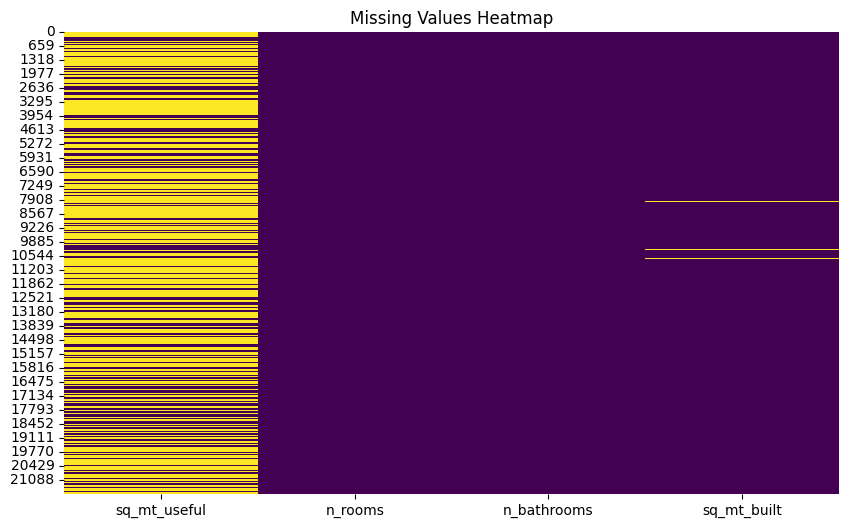

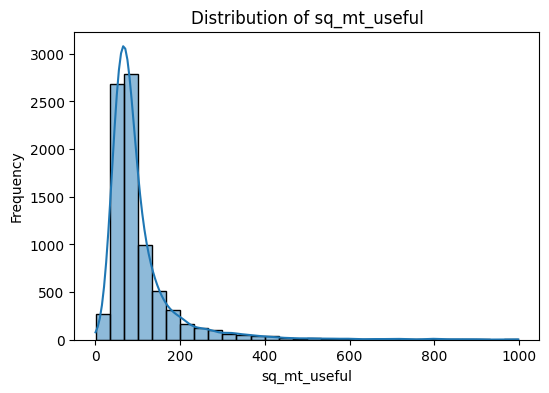

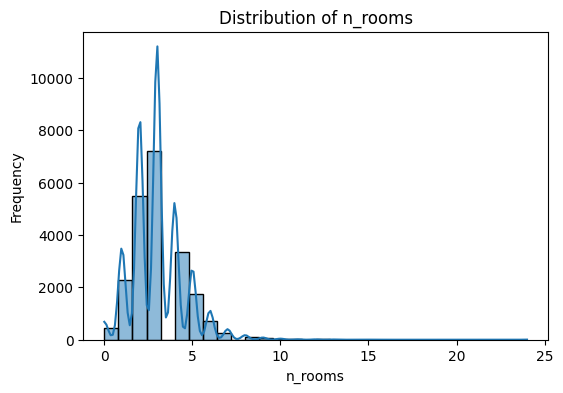

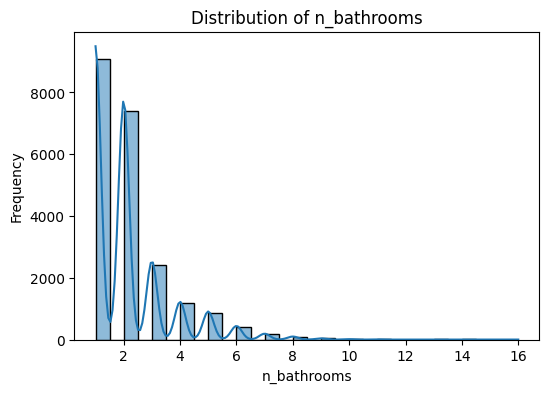

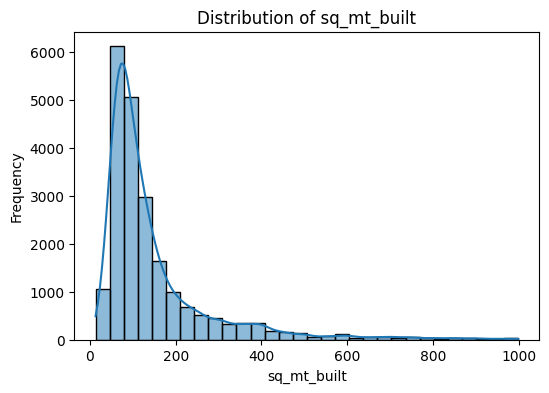

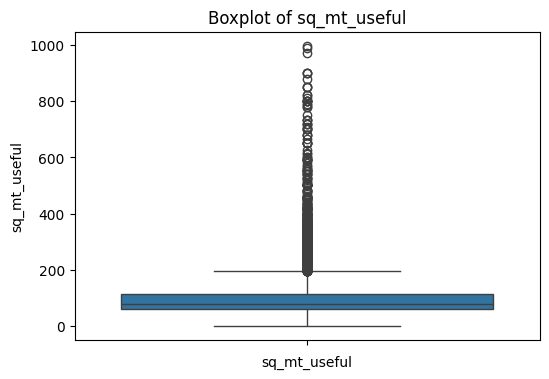

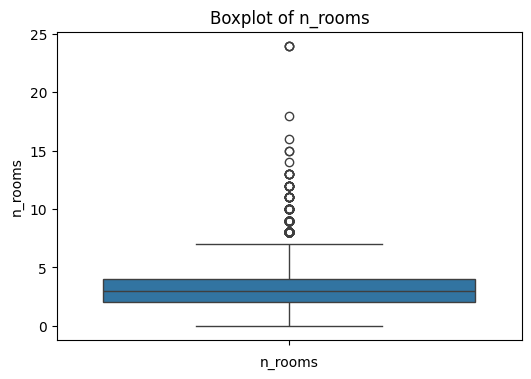

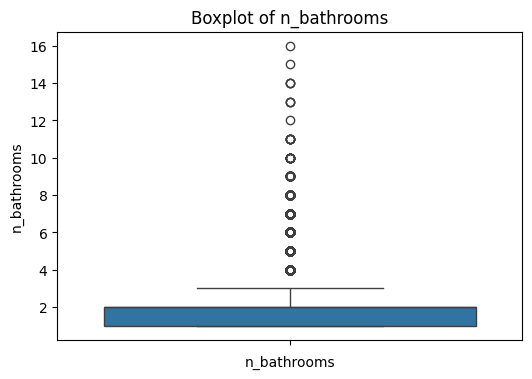

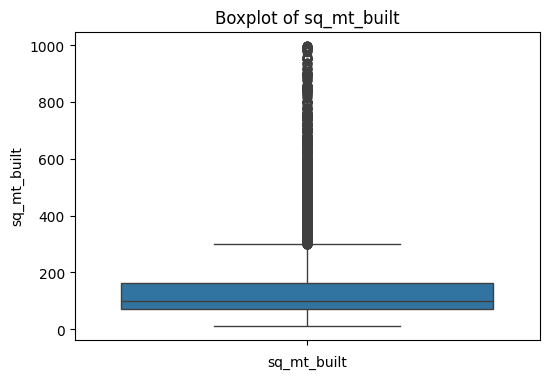

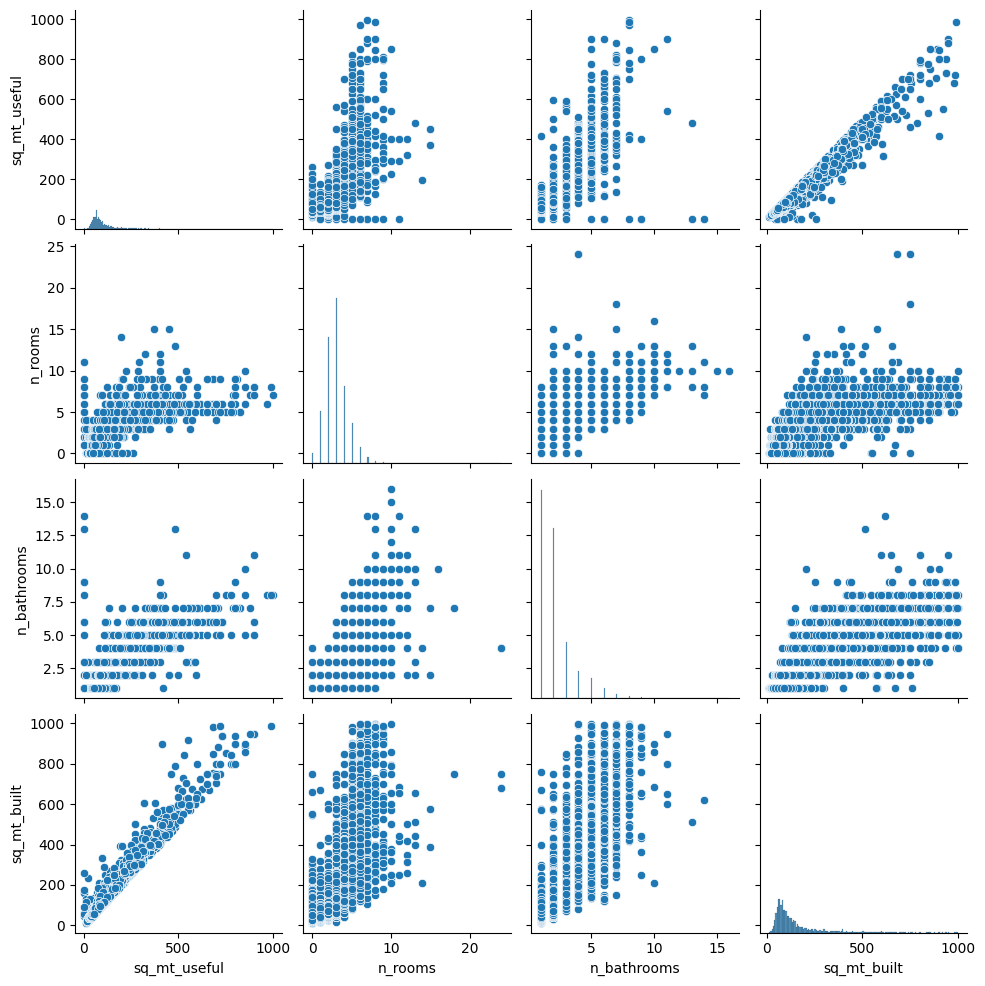

<Figure size 600x400 with 0 Axes>

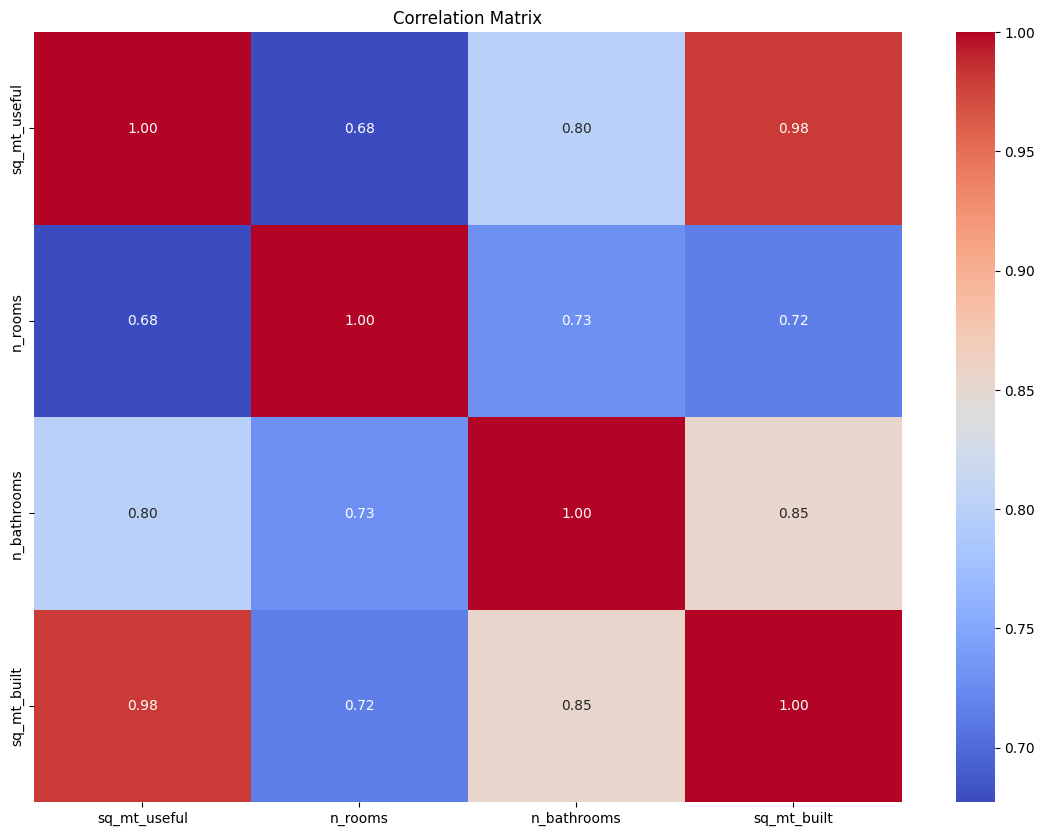

In [24]:
# Pre-cleaning visualizations

# Visualization: Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Visualization: Distribution of Numerical Features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Visualization: Boxplots for Numerical Features to Identify Outliers
for column in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

# Visualization: Pair Plot for a Few Selected Features
selected_features = numerical_features[:5]  # Adjust the number of features as needed
sns.pairplot(data[selected_features])
plt.figure(figsize=(6, 4))
plt.show()

# Visualization: Correlation Matrix
plt.figure(figsize=(14, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Step 3: Data Preparation**

<ipython-input-25-979f03ae7f68>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-25-979f03ae7f68>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-25-979f03ae7f68>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-25-979f03a

sq_mt_useful    0
n_rooms         0
n_bathrooms     0
sq_mt_built     0
dtype: int64


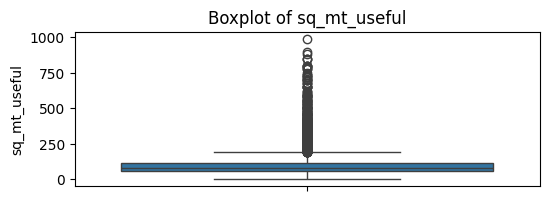

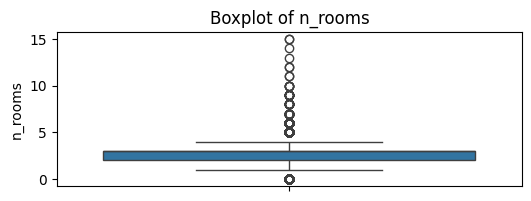

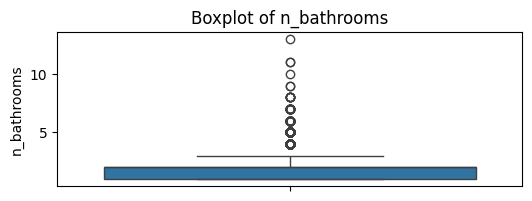

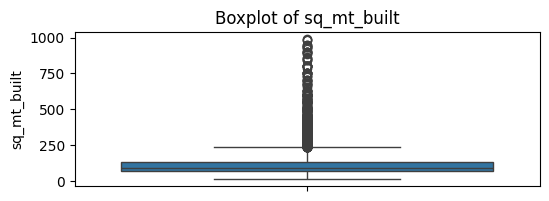

<class 'pandas.core.frame.DataFrame'>
Index: 3921 entries, 0 to 21738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sq_mt_useful  3921 non-null   float64
 1   n_rooms       3921 non-null   int64  
 2   n_bathrooms   3921 non-null   float64
 3   sq_mt_built   3921 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 153.2 KB
None
       sq_mt_useful      n_rooms  n_bathrooms  sq_mt_built
count   3921.000000  3921.000000  3921.000000  3921.000000
mean      83.350676     2.613364     1.603162    99.680184
std       31.399771     0.923041     0.616632    36.671817
min        1.000000     1.000000     1.000000    18.000000
25%       60.000000     2.000000     1.000000    72.000000
50%       80.000000     3.000000     2.000000    95.000000
75%      102.000000     3.000000     2.000000   125.000000
max      185.000000     4.000000     3.000000   191.000000
sq_mt_useful    0
n_rooms         0
n_bathrooms     

In [25]:
# Drop rows where columns is missing.
data = data.dropna(subset=['sq_mt_useful', 'n_rooms', 'n_bathrooms', 'sq_mt_built'])

# Fill missing values for numerical features with the median
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column].fillna(data[column].median(), inplace=True)

# Fill missing values for categorical features with the mode
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Verify that there are no remaining missing values
print(data.isnull().sum())

# Handle outliers
# Plot boxplots to visualize outliers
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Remove outliers using the IQR method
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove duplicates
data = data.drop_duplicates()

# Standardize column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Verify the cleaned data
print(data.info())
print(data.describe())
print(data.isnull().sum())
print(data.head())


Feature Engineering

In [26]:
# Define features and target variable
X = data.drop(columns=['sq_mt_useful'])  # Features
y = data['sq_mt_useful']  # Target variable

# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

# Feature Engineering # Initial
data['total_rooms_bathrooms'] = data['n_rooms'] + data['n_bathrooms']
# Space Efficiency
data['space_efficiency'] = data['sq_mt_useful'] / data['sq_mt_built']

# Apply log transformations if needed
skewed_columns = ['sq_mt_built', 'n_rooms', 'n_bathrooms']
for column in skewed_columns:
    if data[column].skew() > 1:
        data[f'log_{column}'] = np.log1p(data[column])
        data = data.drop(columns=[column])

scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the cleaned and transformed data
print(data.head())


   sq_mt_useful   n_rooms  n_bathrooms  sq_mt_built  total_rooms_bathrooms  \
0     -0.743752 -0.664588    -0.978281    -0.973083              -0.915255   
2     -0.934861 -0.664588     0.643639    -0.154912              -0.162904   
4      0.211790 -0.664588     0.643639     0.226901              -0.162904   
5      0.976225  1.502439     0.643639     0.717804               1.341798   
7      0.530305  0.418925     0.643639     0.690532               0.589447   

   space_efficiency  
0          0.955048  
2         -2.643528  
4         -0.077510  
5          0.630530  
7         -0.407929  


**Step 4: Exploratory Data Analysis (EDA)**

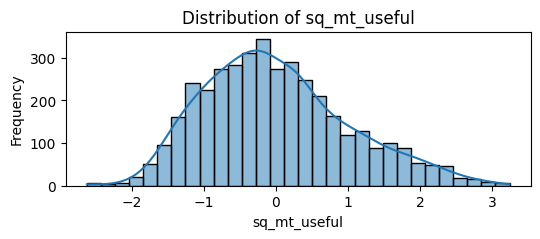

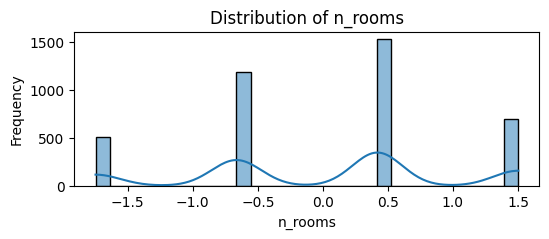

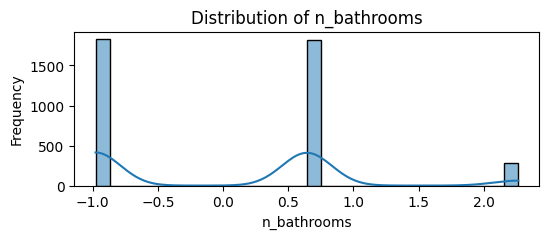

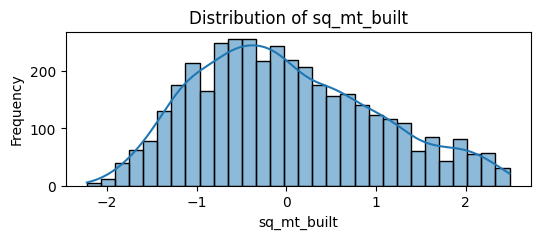

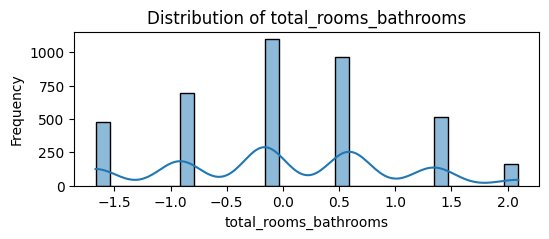

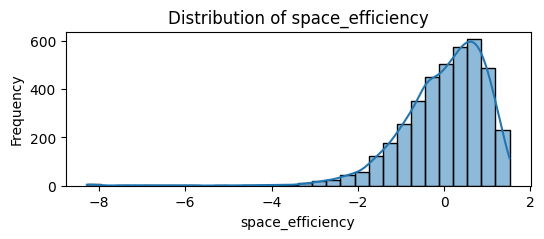

In [27]:
# Visualizations for numerical features
for column in numerical_features:
    plt.figure(figsize=(6, 2))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

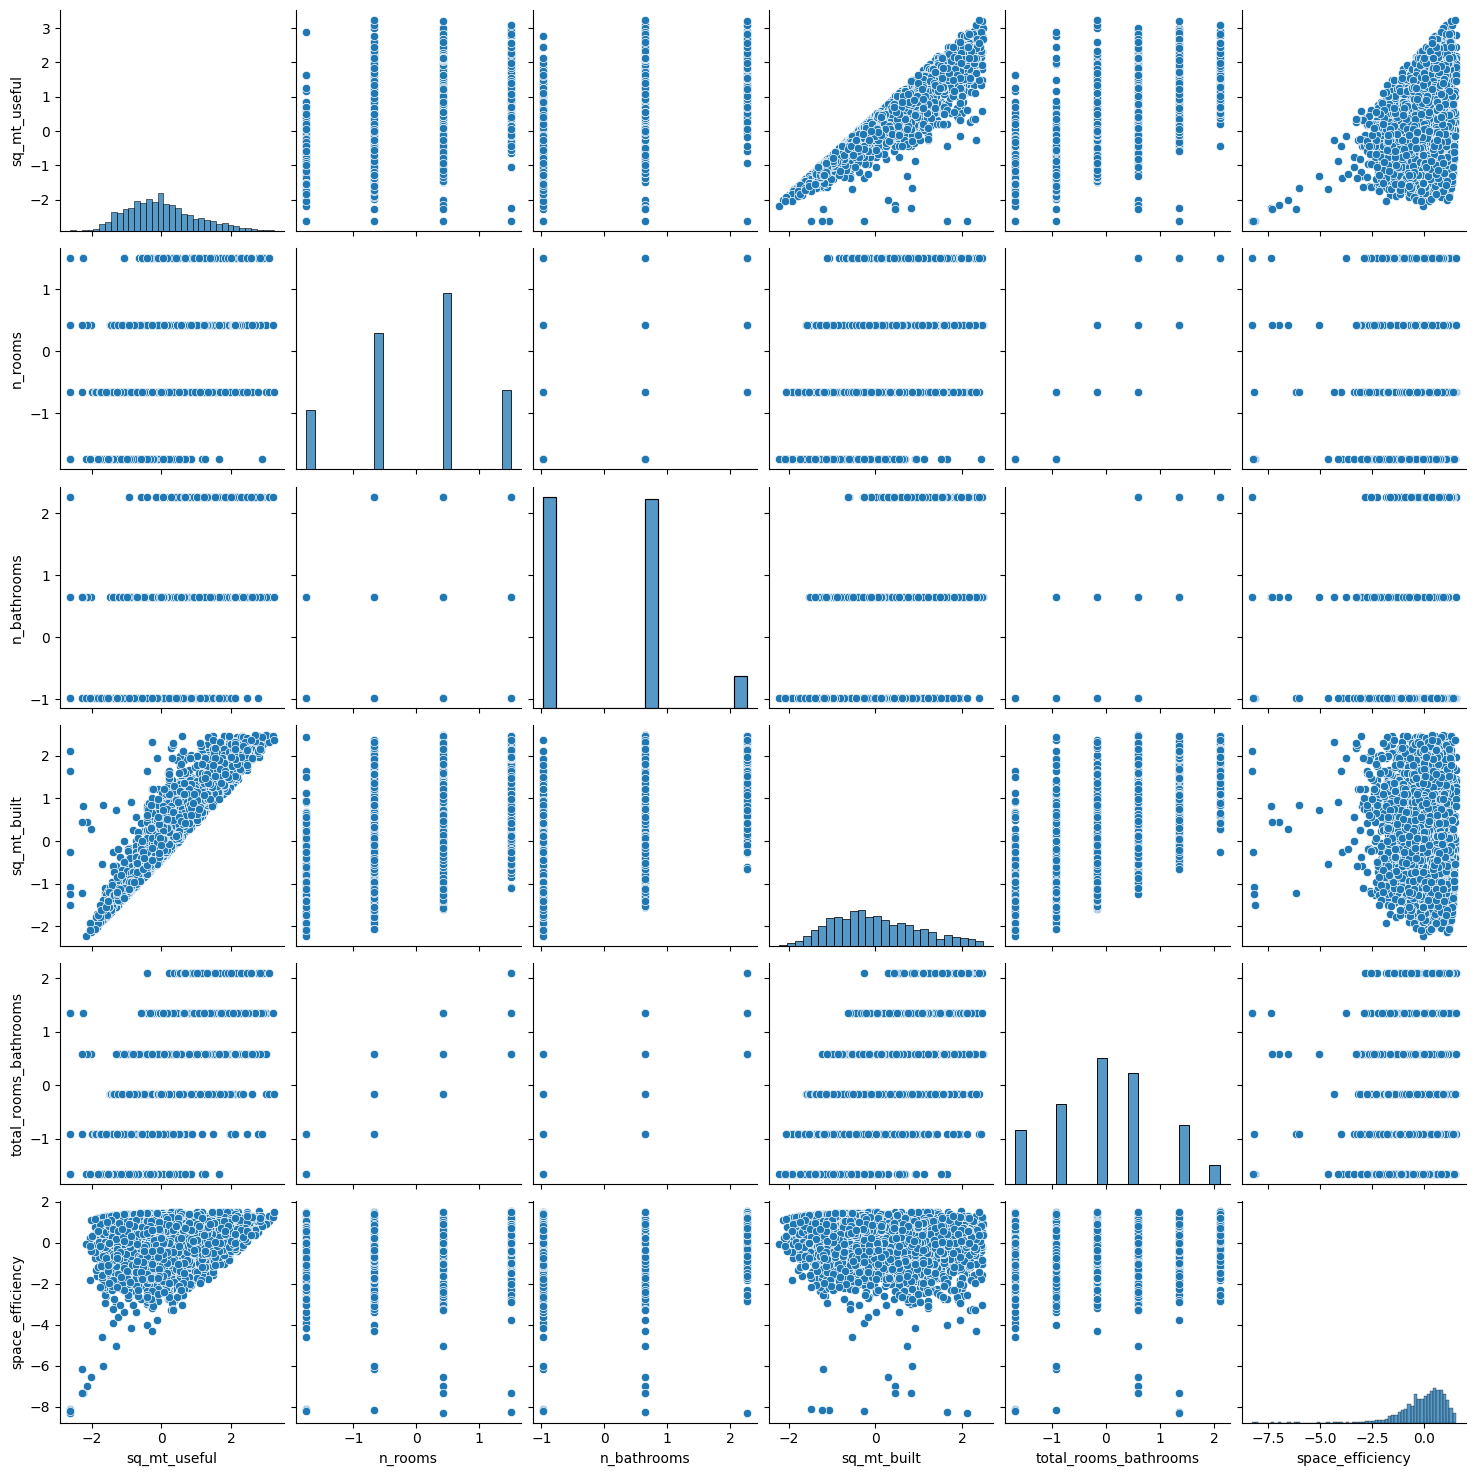

<Figure size 600x200 with 0 Axes>

In [28]:
# Pair plot to visualize relationships between selected features
sns.pairplot(data)
plt.figure(figsize=(6, 2))
plt.show()

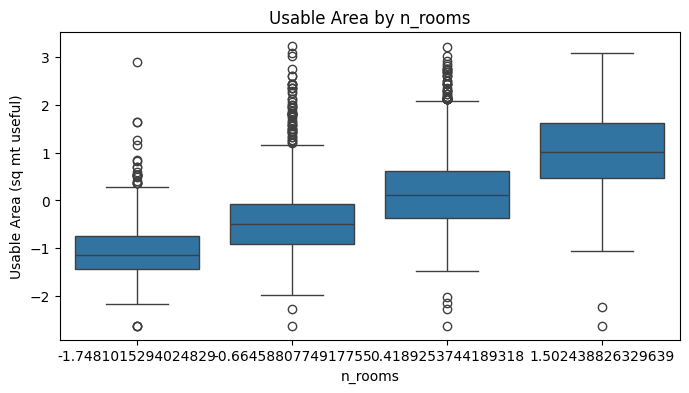

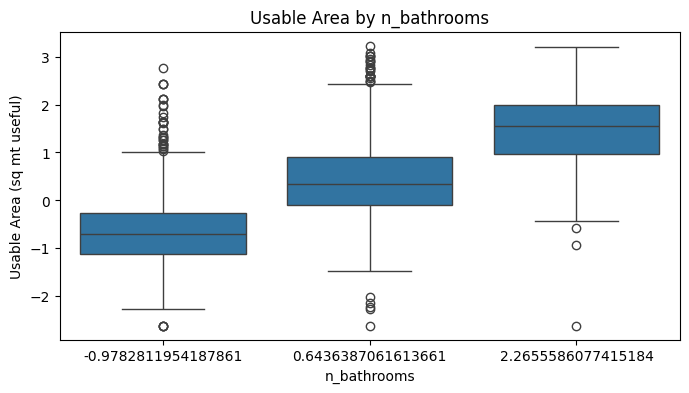

In [29]:
# Boxplot for categorical features vs target variable
categorical_features = ['n_rooms', 'n_bathrooms']

for column in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=column, y='sq_mt_useful', data=data)
    plt.title(f'Usable Area by {column}')
    plt.xlabel(column)
    plt.ylabel('Usable Area (sq mt useful)')
    plt.show()

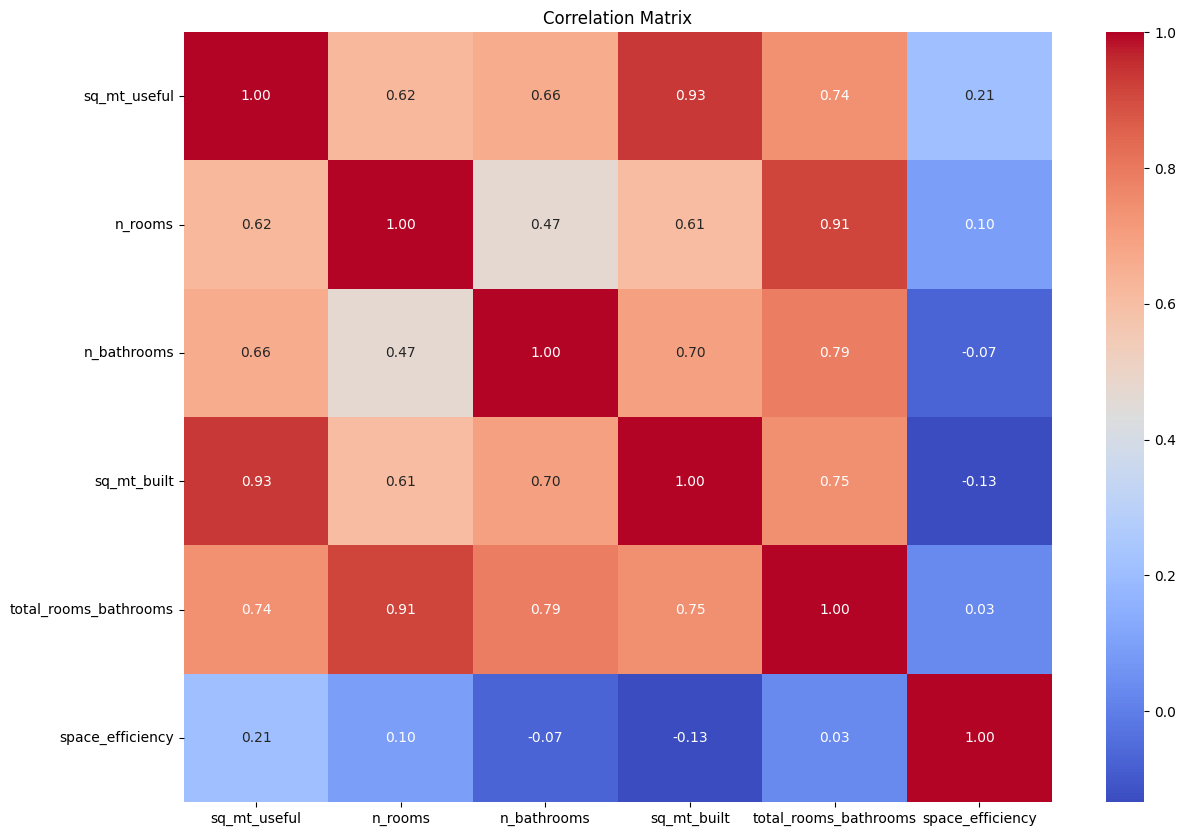

sq_mt_useful             1.000000
sq_mt_built              0.933619
total_rooms_bathrooms    0.739226
n_bathrooms              0.662873
n_rooms                  0.621784
space_efficiency         0.207595
Name: sq_mt_useful, dtype: float64


In [30]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Display correlations with 'sq_mt_useful'
print(corr_matrix['sq_mt_useful'].sort_values(ascending=False))

**Step 5: Regression Modeling and Optimization**

In [31]:
# Define features and target variable
X = data.drop(columns=['sq_mt_useful'])
y = data['sq_mt_useful']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Define parameter grids for GridSearchCV
param_grids = {
    'Ridge Regression': {
        'alpha': [0.1, 1, 10, 100]
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [2, 5, 10]
    }
}

# Train and optimize models with cross-validation
best_models = {}
for model_name, model in models.items():
    if model_name in param_grids:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_models[model_name] = model

# Evaluate models with cross-validation
model_performance = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation score
    cv_score = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_score.mean())

    model_performance[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R-squared': r2,
        'CV_RMSE': cv_rmse
    }

# Display model performance
for model_name, metrics in model_performance.items():
    print(f"{model_name} Performance:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()


Linear Regression Performance:
MSE: 0.01926835855789125
RMSE: 0.13881051313892348
MAE: 0.081169116275646
R-squared: 0.9812042218793892
CV_RMSE: 0.12740854764251758

Ridge Regression Performance:
MSE: 0.019269112623591083
RMSE: 0.13881322928161813
MAE: 0.08116121783354655
R-squared: 0.9812034863080876
CV_RMSE: 0.12735739110694122

Decision Tree Performance:
MSE: 0.0057129950959021285
RMSE: 0.0755843574815724
MAE: 0.031337258761784836
R-squared: 0.9944271232080255
CV_RMSE: 0.0585510401298303

Random Forest Performance:
MSE: 0.004221173894084081
RMSE: 0.0649705617497962
MAE: 0.017513992734689385
R-squared: 0.9958823556410712
CV_RMSE: 0.046152583632695685



**Step 6: Insights and Recommendations**

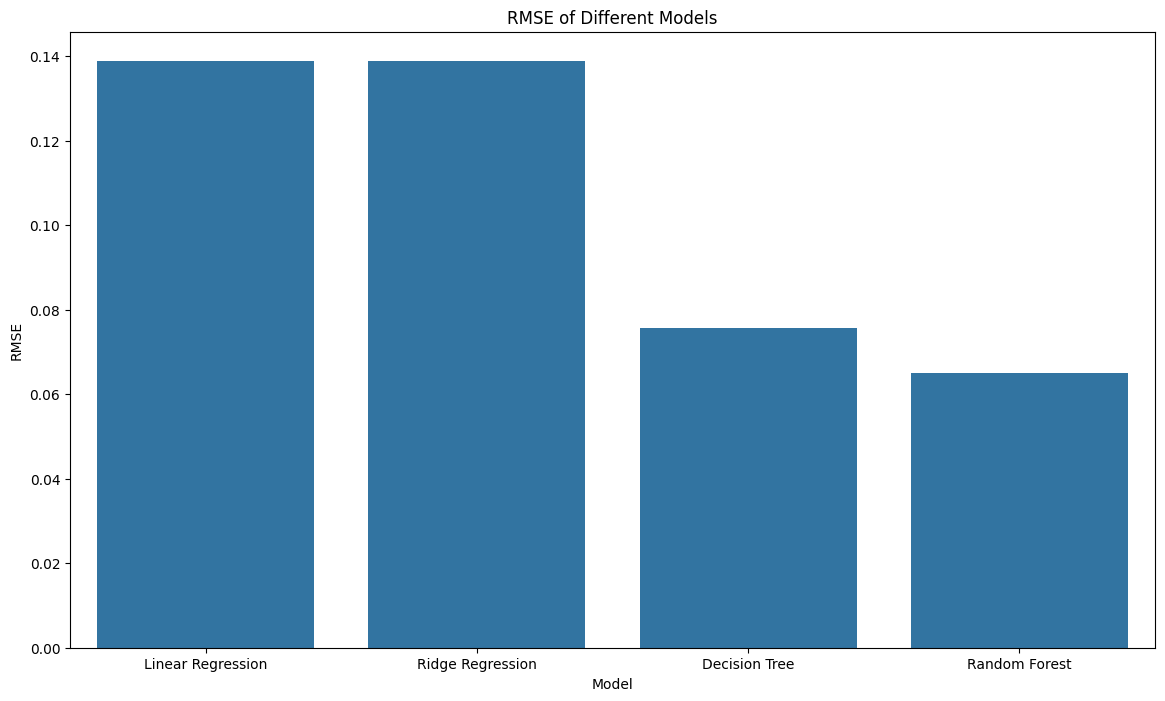

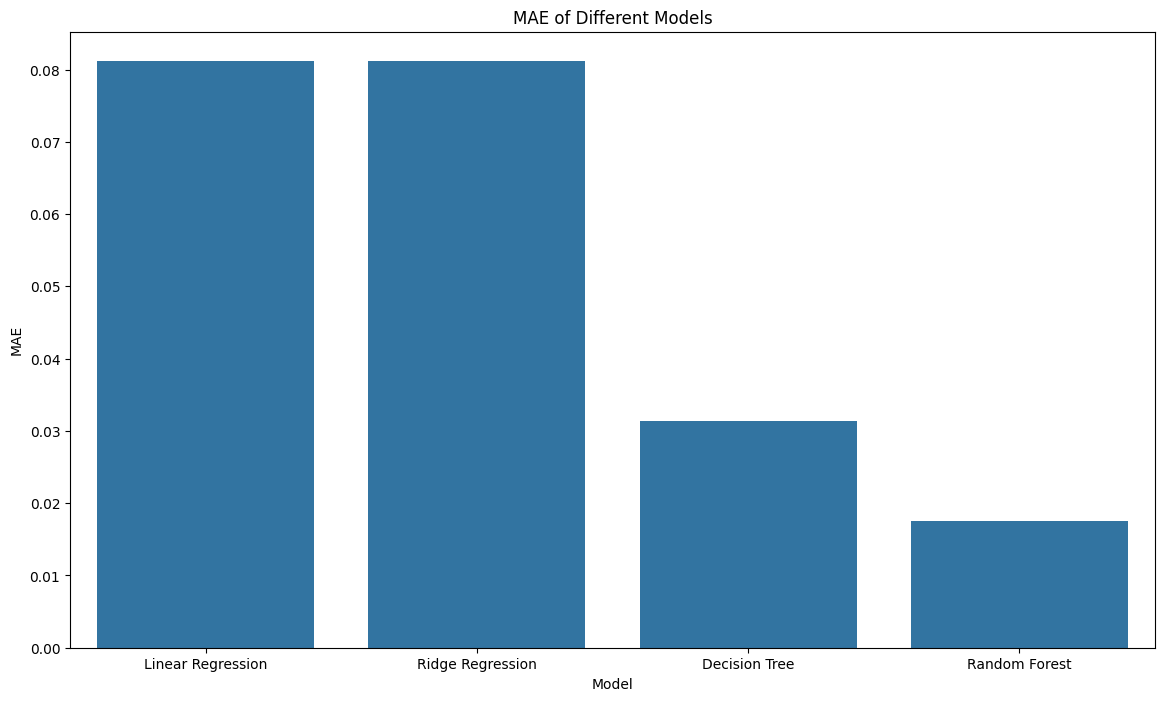

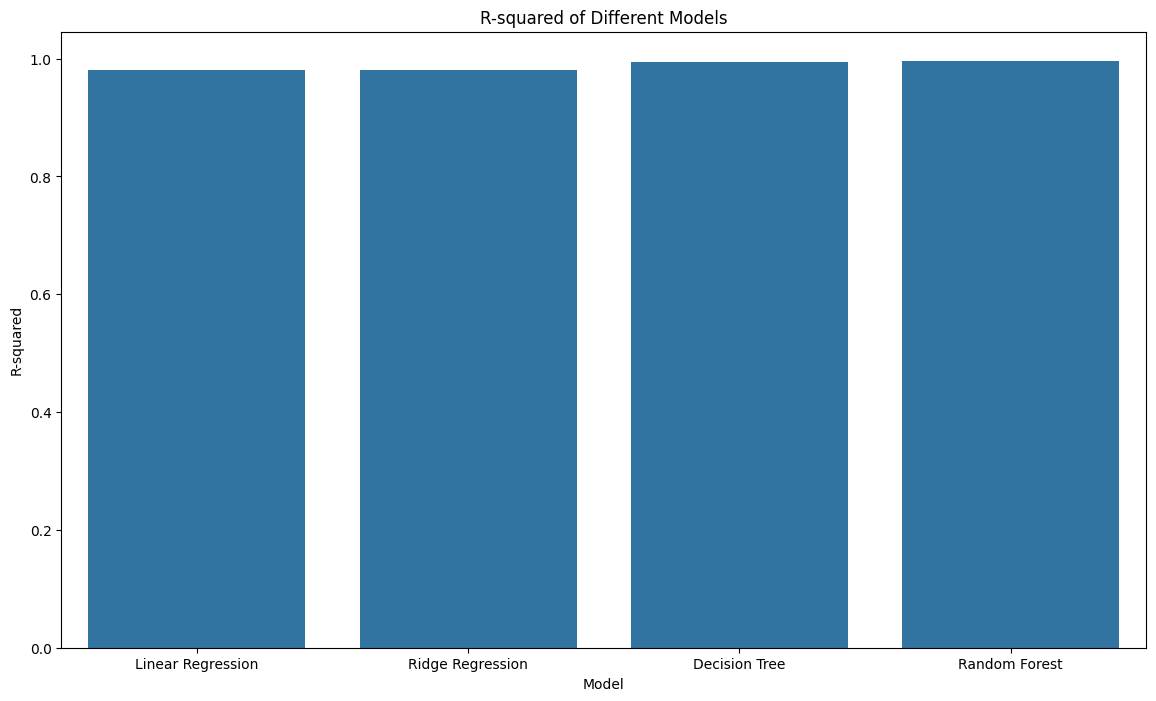

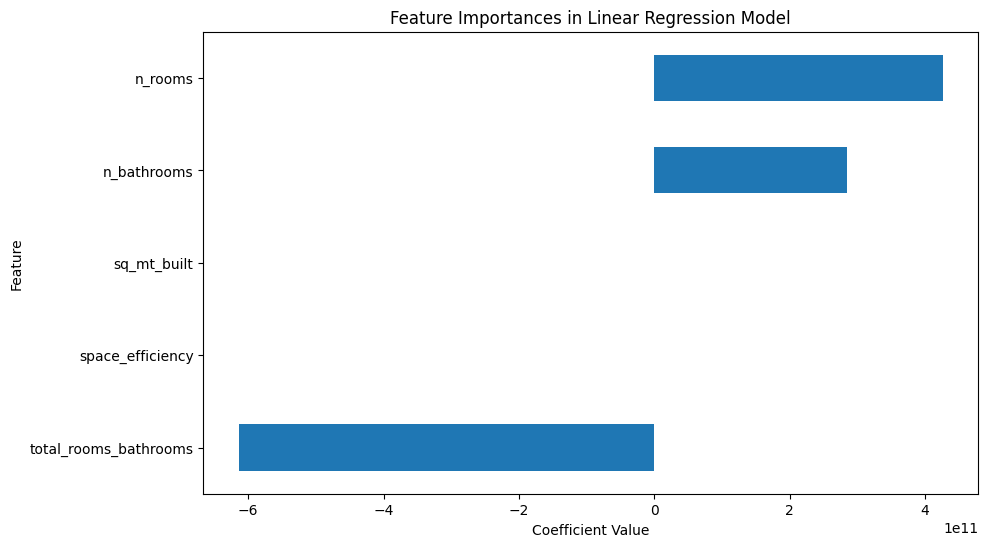

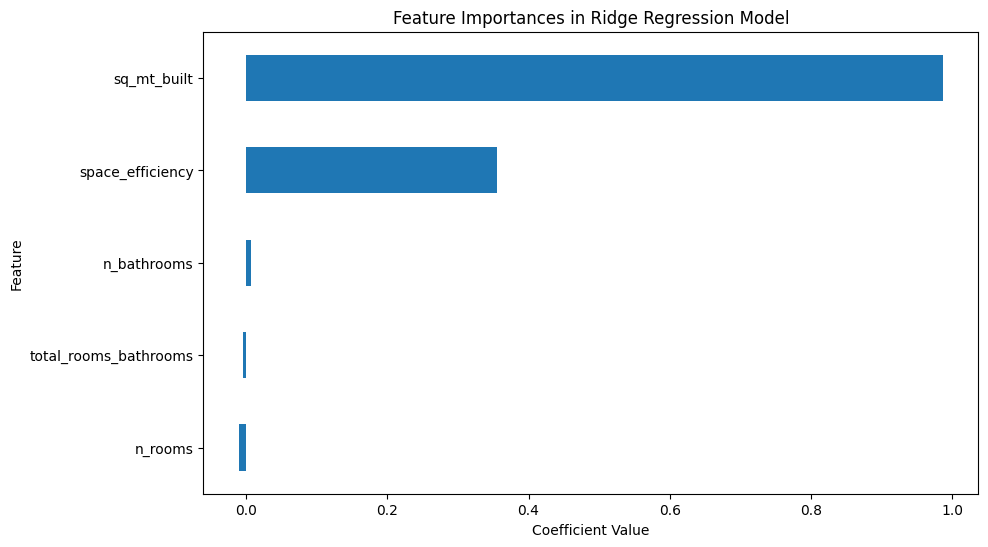

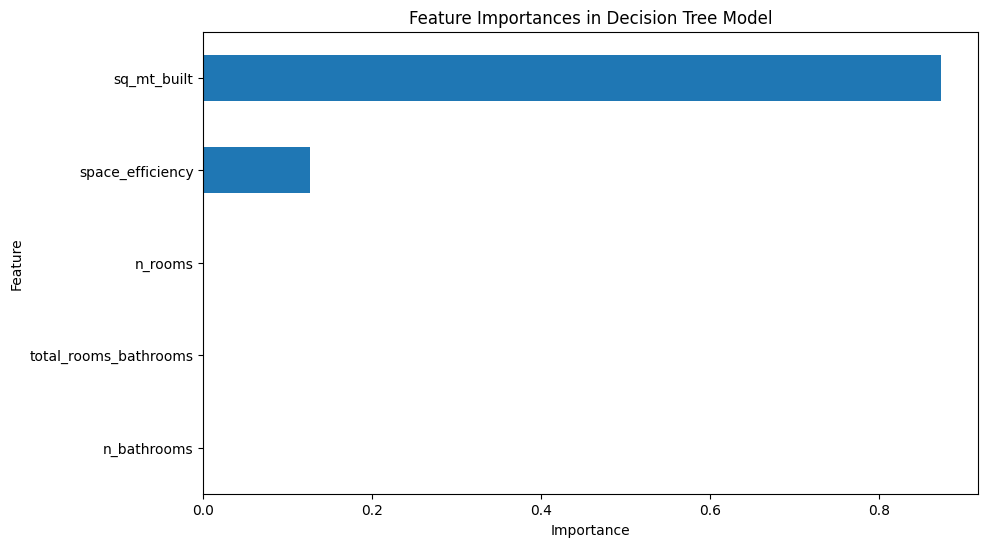

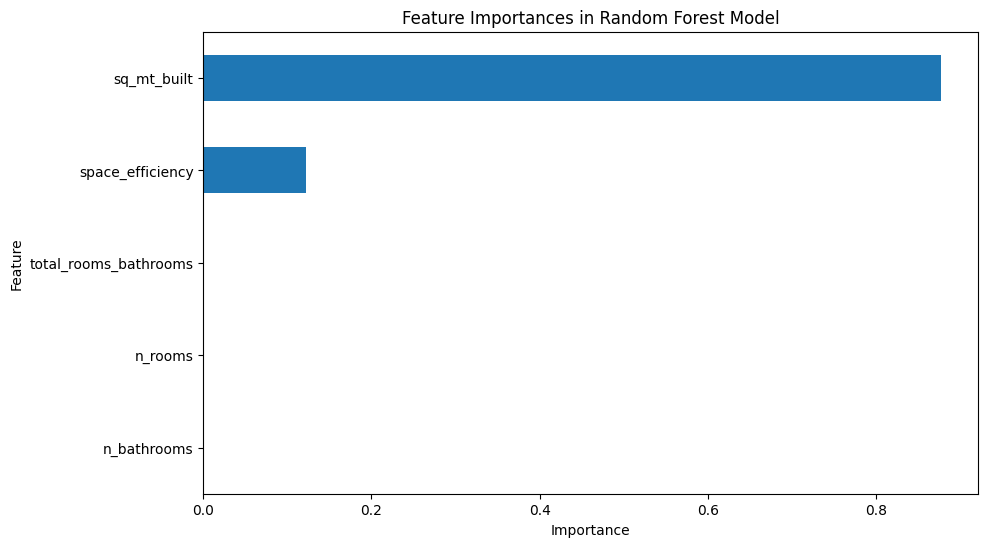

Linear Regression Feature Importances:
n_rooms                  4.265931e+11
n_bathrooms              2.849829e+11
sq_mt_built              9.875015e-01
space_efficiency         3.555191e-01
total_rooms_bathrooms   -6.143667e+11
dtype: float64
Ridge Regression Feature Importances:
sq_mt_built              0.987297
space_efficiency         0.355496
n_bathrooms              0.006380
total_rooms_bathrooms   -0.004572
n_rooms                 -0.010847
dtype: float64

Decision Tree Feature Importances:
sq_mt_built              0.873534
space_efficiency         0.126177
n_rooms                  0.000222
total_rooms_bathrooms    0.000053
n_bathrooms              0.000014
dtype: float64

Random Forest Feature Importances:
sq_mt_built              0.877792
space_efficiency         0.121821
total_rooms_bathrooms    0.000164
n_rooms                  0.000154
n_bathrooms              0.000070
dtype: float64


In [32]:
# Performance metrics for each model
performance_metrics = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [0.01926835855789125, 0.019269112623591083, 0.0057129950959021285, 0.004221173894084081],
    'RMSE': [0.13881051313892348, 0.13881322928161813, 0.0755843574815724, 0.0649705617497962],
    'MAE': [0.081169116275646, 0.08116121783354655, 0.031337258761784836, 0.017513992734689385],
    'R-squared': [0.9812042218793892, 0.9812034863080876, 0.9944271232080255, 0.9958823556410712],
    'CV_RMSE': [0.12740854764251758, 0.12735739110694122, 0.0585510401298303, 0.046152583632695685]
}

performance_df = pd.DataFrame(performance_metrics)

# Plotting performance metrics
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='RMSE', data=performance_df)
plt.title('RMSE of Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='MAE', data=performance_df)
plt.title('MAE of Different Models')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='R-squared', data=performance_df)
plt.title('R-squared of Different Models')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.show()

# Analyzing feature importance for all models

# Linear Regression coefficients
lr_model = best_models['Linear Regression']
lr_coefficients = pd.Series(lr_model.coef_, index=X.columns)

# Ridge Regression coefficients
rr_model = best_models['Ridge Regression']
rr_coefficients = pd.Series(rr_model.coef_, index=X.columns)

# Decision Tree feature importances
dt_model = best_models['Decision Tree']
dt_feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)

# Random Forest feature importances
rf_model = best_models['Random Forest']
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plot feature importances for Linear Regression
plt.figure(figsize=(10, 6))
lr_coefficients.sort_values().plot(kind='barh')
plt.title('Feature Importances in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Plot feature importances for Ridge Regression
plt.figure(figsize=(10, 6))
rr_coefficients.sort_values().plot(kind='barh')
plt.title('Feature Importances in Ridge Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Plot feature importances for Decision Tree
plt.figure(figsize=(10, 6))
dt_feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances in Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Plot feature importances for Random Forest (already done in the previous step)
plt.figure(figsize=(10, 6))
rf_feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Insights from Feature Importances
print("Linear Regression Feature Importances:")
print(lr_coefficients.sort_values(ascending=False))

print("Ridge Regression Feature Importances:")
print(rr_coefficients.sort_values(ascending=False))

print("\nDecision Tree Feature Importances:")
print(dt_feature_importances.sort_values(ascending=False))

print("\nRandom Forest Feature Importances:")
print(rf_feature_importances.sort_values(ascending=False))


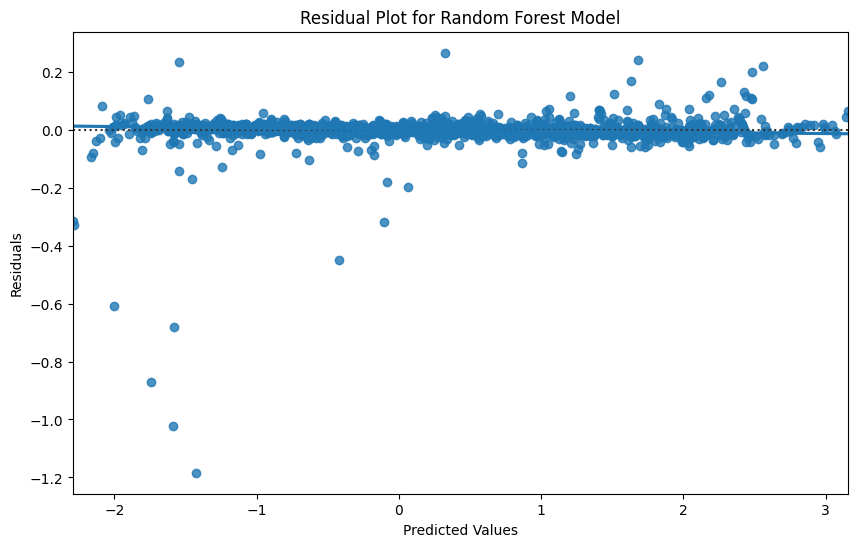

In [33]:
# Residuals for Random Forest model
y_pred_rf = rf_model.predict(X)
residuals_rf = y - y_pred_rf

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_rf, y=residuals_rf, lowess=True)
plt.title('Residual Plot for Random Forest Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


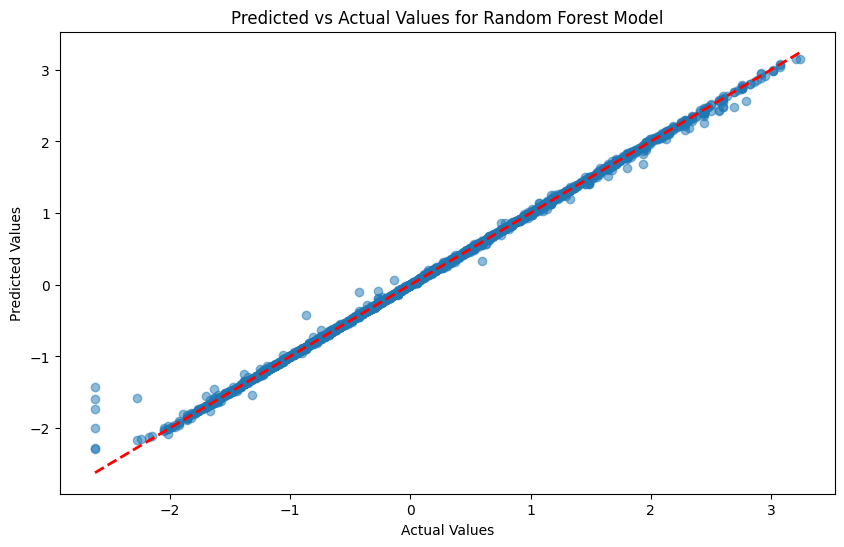

In [34]:
# Predicted vs Actual for Random Forest model
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Values for Random Forest Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()